<a href="https://colab.research.google.com/github/kkrusere/Developing-a-Score-to-Measure-Riskiness-of-Residential-Properties-Insurance/blob/main/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [ ]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 1.2 MB/s 


## <center> **Developing a Score to Measure Riskiness of Residential Properties Insurance** 

<center><em>Developing a Score to Measure Riskiness of Residential buildings, Homes, Apartments and Condos as part of an insurance policy underwriting. Insurance underwriting is how an insurance company evaluates its risk. In this project, we identify and explore multiple data sources to collect variables that could be used to develop a score that measures the riskiness of residential buildings to aid the insurance underwriting process.</em></center>


<center><img src="https://github.com/kkrusere/Developing-a-Score-to-Measure-Riskiness-of-Residential-Properties-Insurance/blob/main/assets/real-estate-risk.jpg?raw=1" width=600/></center>

***Project Contributors:*** Kuzi Rusere and Umair Shaikh<br>
**MVP streamlit App URL:** https://kkrusere-developing-a-score-to-measure-prototype-mvp-app-acxav4.streamlitapp.com

### **Modeling, Evaluation and Analysis of Clusters** 

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px

%matplotlib inline

### Reading Data


In [ ]:
# import mysql.connector as connection
# from sqlalchemy import create_engine
# import config #this holds our credentials for the database 

# host= config.host
# user= config.user
# db_password = config.password
# port = config.port
# database = config.database

# engine = create_engine(f"mysql+pymysql://{user}:{db_password}@{host}/{database}")

# try:
#     query = f"SELECT * FROM NYC_crime"
#     data = pd.read_sql(query,engine)

# except Exception as e:
#     print(str(e))

In [ ]:
fdnyc_data = pd.read_csv("/content/drive/MyDrive/Capstone Project/Fire_Incident_Dispatch_Data100000.csv")

In [ ]:
fdnyc_data.head()

,INCIDENT_DATETIME,INCIDENT_BOROUGH,ZIPCODE,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP
0,2014-03-15 06:39:53,MANHATTAN,10010.0,First Alarm,Multiple Dwelling 'A' - Other fire,Structural Fires
1,2021-03-18 08:53:00,BROOKLYN,11232.0,First Alarm,Multiple Dwelling 'A' - Food on the stove fire,Structural Fires
2,2020-07-15 19:26:00,MANHATTAN,10023.0,First Alarm,Multiple Dwelling 'A' - Food on the stove fire,Structural Fires
3,2012-02-10 12:22:46,MANHATTAN,10023.0,First Alarm,Multiple Dwelling 'A' - Other fire,Structural Fires
4,2014-06-18 18:05:02,BROOKLYN,11212.0,First Alarm,Multiple Dwelling 'B' Fire,Structural Fires


In [ ]:
#we need to covert the zipcode from datatype float to string since it is a categorical data
fdnyc_data['ZIPCODE'] = fdnyc_data['ZIPCODE'].astype(int)
fdnyc_data['ZIPCODE'] = fdnyc_data['ZIPCODE'].astype(str)
fdnyc_data.head()

,INCIDENT_DATETIME,INCIDENT_BOROUGH,ZIPCODE,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP
0,2014-03-15 06:39:53,MANHATTAN,10010,First Alarm,Multiple Dwelling 'A' - Other fire,Structural Fires
1,2021-03-18 08:53:00,BROOKLYN,11232,First Alarm,Multiple Dwelling 'A' - Food on the stove fire,Structural Fires
2,2020-07-15 19:26:00,MANHATTAN,10023,First Alarm,Multiple Dwelling 'A' - Food on the stove fire,Structural Fires
3,2012-02-10 12:22:46,MANHATTAN,10023,First Alarm,Multiple Dwelling 'A' - Other fire,Structural Fires
4,2014-06-18 18:05:02,BROOKLYN,11212,First Alarm,Multiple Dwelling 'B' Fire,Structural Fires


In [ ]:
X = fdnyc_data.drop(columns=['INCIDENT_DATETIME','INCIDENT_CLASSIFICATION_GROUP'])

In [ ]:
X.head()

,INCIDENT_BOROUGH,ZIPCODE,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION
0,MANHATTAN,10010,First Alarm,Multiple Dwelling 'A' - Other fire
1,BROOKLYN,11232,First Alarm,Multiple Dwelling 'A' - Food on the stove fire
2,MANHATTAN,10023,First Alarm,Multiple Dwelling 'A' - Food on the stove fire
3,MANHATTAN,10023,First Alarm,Multiple Dwelling 'A' - Other fire
4,BROOKLYN,11212,First Alarm,Multiple Dwelling 'B' Fire


In [ ]:
!pip install kmodes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Modeling and Evaluation

In [ ]:
from kmodes.kmodes import KModes

Our modeling is divided into phases, this is the first part where we are going to be clustering our FDNYC fire incidence Data and NYPD Crime Data. The idea here is to cluster the data and analyze the cluster after. The goal of the analysis is to have a perspective of the attributes and features that caused or resulted in the data entries being clustered together.

For this, we are going to be using Kmode clustering. The most common unsupervised clustering algorithm is the Kmean clustering, it is a go-to machine learning algorithm when it comes to unlabeled data that needs to be grouped in some way that reviews patterns and insight within the data, provided that the data is numerical. Since our data is far from being numerical except for zip codes, latitudes, and longitudes, we cannot use Kmeans clustering. Hence, comes in Kmodes which is an extension of the Kmeans clustering algorithm that uses simple matching dissimilarity measures for categorical objects, where the means are replaced by modes of clusters.


<center><img src="https://github.com/kkrusere/Developing-a-Score-to-Measure-Riskiness-of-Residential-Properties-Insurance/blob/main/assets/kmodes.png?raw=1" width=600/></center>



Choosing the Appropriate Number of Clusters

We are going to look at the most commonly used method to evaluate the appropriate number of clusters:

* The elbow method


##### For FDNYC

In [ ]:
kmodes_param = {
    "init": "random",
    "n_init": 5,
    "max_iter": 10,
    "random_state": 42,
}
# A list holds the Cost values for each k
fdnyc_cost = []
for k in range(1, 11):
    fdnyc_kmode = KModes(n_clusters=k, **kmodes_param, verbose=1)
    fdnyc_kmode.fit_predict(X)
    fdnyc_cost.append(fdnyc_kmode.cost_)




Here, we are going to use the elbow method to "Evaluate" the model. A heuristic approach is used in determining the number of clusters in a data set by basically plotting the explained variation as a function of the number of clusters. The ideal number of clusters to use for the modeling correspond to the elbow of the curve.In other words, the method is used to determine the optimal number of clusters in k-means clustering (and in our case, kmodes clustering).

<center><img src="https://github.com/kkrusere/Developing-a-Score-to-Measure-Riskiness-of-Residential-Properties-Insurance/blob/main/assets/elbow_method.png?raw=1" width=600/></center>


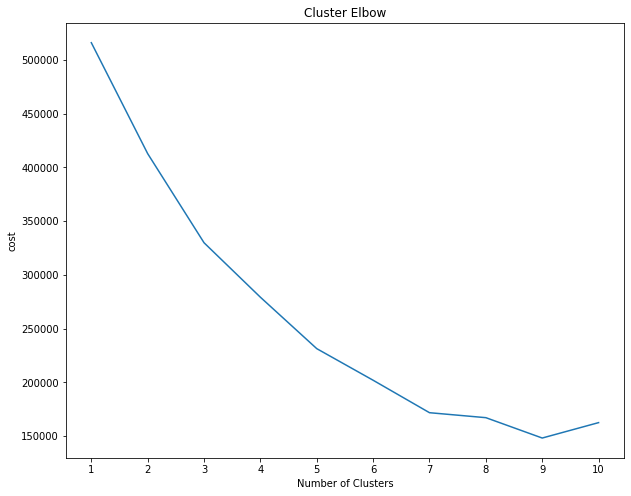

In [ ]:
#lest plot the elbow
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), fdnyc_cost)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("cost")
plt.title("Cluster Elbow")
plt.show()

From the above, it looks like 7,8 and 9 can be used as clusters. We are going to be choosing 9 as the number of clusters. So, for the training of our model, `n_clusters` = 9.

In [ ]:
fdnyc_kmode = KModes(n_clusters=9, init = "random", n_init = 5, verbose=1)
fdnyc_clusters = fdnyc_kmode.fit_predict(X)
fdnyc_data.insert(0, "Cluster", fdnyc_clusters, True)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 28401, cost: 137653.0
Run 1, iteration: 2/100, moves: 7722, cost: 136999.0
Run 1, iteration: 3/100, moves: 71, cost: 136999.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 18181, cost: 151814.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 42203, cost: 150687.0
Run 3, iteration: 2/100, moves: 4283, cost: 150687.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 24717, cost: 151233.0
Run 4, iteration: 2/100, moves: 872, cost: 151233.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 17705, cost: 134804.0
Run 5, iteration: 2/100, moves: 89, cost: 134804.0
Best run was number 5


Below is the resulting dataframe after adding adding the cluster column. We are going to save the dataframe as a csv file for use later in the analysis of the clusters section. The idea is to look at the clusters and analyze answering the question `Why did the model cluster these row entries into one cluster?` The answer to thjis question will give us a perspective on how to rank the one cluster with respect to the other clusters. within our analysis, we will keep trac of some `Key performance metrics/indicators` such as for example, given a particular `crime`if we are looking at the NYPD dataset or given a particular `complaint` what are the chances of that occuring in a particular `zipcode` or `borough`. 

In [ ]:
fdnyc_data.head()

,Cluster,INCIDENT_DATETIME,INCIDENT_BOROUGH,ZIPCODE,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP
0,0,2014-03-15 06:39:53,MANHATTAN,10010,First Alarm,Multiple Dwelling 'A' - Other fire,Structural Fires
1,2,2021-03-18 08:53:00,BROOKLYN,11232,First Alarm,Multiple Dwelling 'A' - Food on the stove fire,Structural Fires
2,7,2020-07-15 19:26:00,MANHATTAN,10023,First Alarm,Multiple Dwelling 'A' - Food on the stove fire,Structural Fires
3,0,2012-02-10 12:22:46,MANHATTAN,10023,First Alarm,Multiple Dwelling 'A' - Other fire,Structural Fires
4,2,2014-06-18 18:05:02,BROOKLYN,11212,First Alarm,Multiple Dwelling 'B' Fire,Structural Fires


In [ ]:
#lets save the data to a csv for later use in the analysis of the clusters.
fdnyc_data.to_csv("/content/drive/MyDrive/Capstone Project/MODEL_Fire_Incident_Dispatch_Data.csv", index=False)

##### For NYPD

In [ ]:
#readin the NYPD Data
nypd_data = pd.read_csv("/content/drive/MyDrive/Capstone Project/NYPD_Complaint_Data_Historic.csv")
nypd_data.dropna(inplace=True)
nypd_data.head()

,RPT_DT,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Latitude,Longitude
0,06/10/2018,OFF. AGNST PUB ORD SENSBLTY &,COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,40.759310,-73.994706
1,08/04/2018,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,BRONX,INSIDE,RESIDENCE - APT. HOUSE,40.826170,-73.916831
2,11/04/2018,FELONY ASSAULT,COMPLETED,FELONY,QUEENS,INSIDE,RESIDENCE-HOUSE,40.707858,-73.759307
3,05/24/2018,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,MISDEMEANOR,BRONX,INSIDE,RESIDENCE-HOUSE,40.882615,-73.851948
4,11/18/2018,ROBBERY,COMPLETED,FELONY,BRONX,INSIDE,RESIDENCE - APT. HOUSE,40.850357,-73.882989


In [ ]:
X = nypd_data.drop(["RPT_DT", "Latitude",	"Longitude"],  axis=1)

In [ ]:
#we model
kmodes_param = {
    "init": "random",
    "n_init": 5,
    "max_iter": 10,
    "random_state": 42,
}
# A list holds the cost values for each k
nypd_cost = []
for k in range(1, 11):
    nypd_kmode = KModes(n_clusters=k, **kmodes_param, verbose=1)
    nypd_kmode.fit_predict(X)
    nypd_cost.append(nypd_kmode.cost_)




In [ ]:
#lets plot the elbow
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), nypd_cost)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("cost")
plt.title("Cluster Elbow")
plt.show()

In [ ]:
nypd_kmode = KModes(n_clusters=5, init = "random", n_init = 5, verbose=1)
clusters = nypd_kmode.fit_predict(X)
nypd_data.insert(0, "Cluster", clusters, True)

In [ ]:
nypd_data.head()

In [ ]:
nypd_data.to_csv("/content/drive/MyDrive/Capstone Project/MODEL_NYPD_Complaint_Data_Historic.csv", index=False)

##### For the NYC Complaints and Service Requests 

Here, we will do the same thing that we have done with the NYPD and FDNY datasets. we are going to create a clustering 

In [ ]:
#readin the NYC Complaints and servise request Data = nyc_csr311_data
nyc_csr311_data = pd.read_csv("/content/drive/MyDrive/Capstone Project/NYC311Open_Data100000.csv")
nyc_csr311_data.dropna(inplace=True)
nyc_csr311_data.head()

,Unique Key,Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Resolution Description,Borough,Latitude,Longitude
0,29491303,2014-12-14,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10075.0,508 EAST 78 STREET,EAST 78 STREET,ADDRESS,NEW YORK,The Police Department responded and upon arriv...,MANHATTAN,40.770452,-73.950341
1,29234415,2014-11-06,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10029.0,127 EAST 107 STREET,EAST 107 STREET,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.793157,-73.946330
2,23185964,2012-05-07,HPD,Department of Housing Preservation and Develop...,NONCONST,CARBON MONOXIDE,RESIDENTIAL BUILDING,11434.0,178-09 114 ROAD,114 ROAD,ADDRESS,JAMAICA,The Department of Housing Preservation and Dev...,QUEENS,40.693417,-73.770789
3,40093189,2018-08-24,HPD,Department of Housing Preservation and Develop...,FLOORING/STAIRS,FLOOR,RESIDENTIAL BUILDING,10031.0,583 RIVERSIDE DRIVE,RIVERSIDE DRIVE,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.821355,-73.957193
4,29693040,2015-01-11,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11204.0,1402 WEST 4 STREET,WEST 4 STREET,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.611846,-73.978444


In [ ]:
#we need to covert the zipcode from datatype float to string since it is a categorical data
nyc_csr311_data['Incident Zip'] = nyc_csr311_data['Incident Zip'].astype(int)
nyc_csr311_data['Incident Zip'] = nyc_csr311_data['Incident Zip'].astype(str)
nyc_csr311_data.head()

,Unique Key,Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Resolution Description,Borough,Latitude,Longitude
0,29491303,2014-12-14,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10075,508 EAST 78 STREET,EAST 78 STREET,ADDRESS,NEW YORK,The Police Department responded and upon arriv...,MANHATTAN,40.770452,-73.950341
1,29234415,2014-11-06,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10029,127 EAST 107 STREET,EAST 107 STREET,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.793157,-73.946330
2,23185964,2012-05-07,HPD,Department of Housing Preservation and Develop...,NONCONST,CARBON MONOXIDE,RESIDENTIAL BUILDING,11434,178-09 114 ROAD,114 ROAD,ADDRESS,JAMAICA,The Department of Housing Preservation and Dev...,QUEENS,40.693417,-73.770789
3,40093189,2018-08-24,HPD,Department of Housing Preservation and Develop...,FLOORING/STAIRS,FLOOR,RESIDENTIAL BUILDING,10031,583 RIVERSIDE DRIVE,RIVERSIDE DRIVE,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.821355,-73.957193
4,29693040,2015-01-11,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11204,1402 WEST 4 STREET,WEST 4 STREET,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.611846,-73.978444


In [ ]:
nyc_csr311_data = nyc_csr311_data[['Unique Key', 'Agency Name', 'Complaint Type','Descriptor', 'Location Type', 'Incident Zip','City','Borough']]
nyc_csr311_data.head()

,Unique Key,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,City,Borough
0,29491303,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10075,NEW YORK,MANHATTAN
1,29234415,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10029,NEW YORK,MANHATTAN
2,23185964,Department of Housing Preservation and Develop...,NONCONST,CARBON MONOXIDE,RESIDENTIAL BUILDING,11434,JAMAICA,QUEENS
3,40093189,Department of Housing Preservation and Develop...,FLOORING/STAIRS,FLOOR,RESIDENTIAL BUILDING,10031,NEW YORK,MANHATTAN
4,29693040,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11204,BROOKLYN,BROOKLYN


In [ ]:
X = nyc_csr311_data[['Agency Name', 'Complaint Type','Descriptor', 'Location Type', 'Incident Zip','City','Borough']]

In [ ]:
#we model
kmodes_param = {
    "init": "random",
    "n_init": 5,
    "max_iter": 10,
    "random_state": 42,
}
# A list holds the cost values for each k
nyc_csr311_cost = []
for k in range(1, 11):
    nyc_csr311_kmode = KModes(n_clusters=k, **kmodes_param, verbose=1)
    nyc_csr311_kmode.fit_predict(X)
    nyc_csr311_cost.append(nyc_csr311_kmode.cost_)


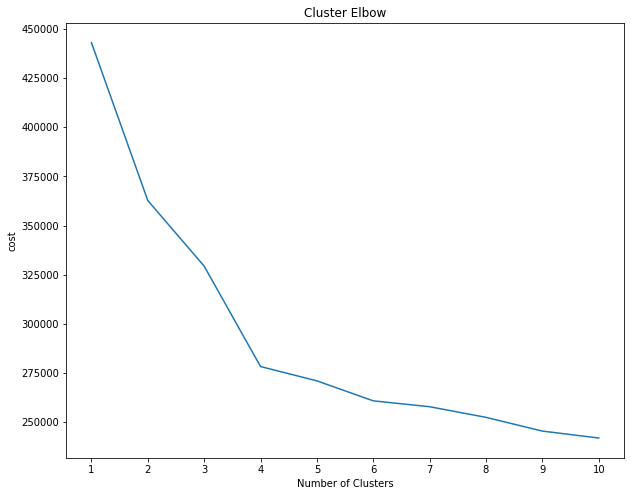

In [ ]:
#lets plot the elbow
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), nyc_csr311_cost)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("cost")
plt.title("Cluster Elbow")
plt.show()

In [ ]:
nyc_csr311_kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1)
nyc_csr311_clusters = nyc_csr311_kmode.fit_predict(X)
nyc_csr311_data.insert(0, "Cluster", nyc_csr311_clusters, True)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3590, cost: 306318.0
Run 1, iteration: 2/100, moves: 109, cost: 306318.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 10111, cost: 342587.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 12224, cost: 303001.0
Run 3, iteration: 2/100, moves: 824, cost: 303001.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 21775, cost: 302234.0
Run 4, iteration: 2/100, moves: 17716, cost: 301137.0
Run 4, iteration: 3/100, moves: 4118, cost: 300858.0
Run 4, iteration: 4/100, moves: 344, cost: 300858.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4500, cost: 307965.0
Best run was number 4


In [ ]:
nyc_csr311_data.head()

,Cluster,Unique Key,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,City,Borough
0,0,29491303,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10075,NEW YORK,MANHATTAN
1,1,29234415,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10029,NEW YORK,MANHATTAN
2,1,23185964,Department of Housing Preservation and Develop...,NONCONST,CARBON MONOXIDE,RESIDENTIAL BUILDING,11434,JAMAICA,QUEENS
3,0,40093189,Department of Housing Preservation and Develop...,FLOORING/STAIRS,FLOOR,RESIDENTIAL BUILDING,10031,NEW YORK,MANHATTAN
4,1,29693040,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11204,BROOKLYN,BROOKLYN


In [ ]:
nyc_csr311_data.to_csv("/content/drive/MyDrive/Capstone Project/MODEL_NYC311Open_Data.csv", index=False)

### Analysis of Clusters 

We are going to create a pandas groupedby object using the cluster column. This will be usefull and will enable us to create reusable fuctions for fetching the same kind of data for different clusters.

In [ ]:
#lets create some helper fuctions

def get_cluster_df(cluster_name, cluster_grouped_dataset=cluster_grouped_dataset):
  """
  This function basically takes in the name of the cluster and uses that to filter the `cluster_grouped_dataset`
  The function returns a dataframe filtered for the specific cluster (the cluster is also reindexed)
  """
  cluster_filtered_df = cluster_grouped_dataset.get_group('0')
  cluster_filtered_df = cluster_filtered_df.reset_index(drop=True)

  return cluster_filtered_df

def get_borough_df(cluster_df, borough_name):
  borough_grouped_ob = cluster_df.groupby('INCIDENT_BOROUGH')
  """
  This fuction basically takes in the specific cluster filtered dataframe and return the borough filtered dataframe
  We will have a try~catch here to handle cases where the requested borough is not in the dataset/dataframe
  """
  try:
    borough_df = borough_grouped_ob.get_group(borough_name)
    borough_df = borough_df.reset_index(drop= True)
  except:
    return f"We could not process your request for the {borough_name} filtered dataframe. The borough might not be present in the cluster specified"
  return borough_df

  

#### For FDNYC

We will read the data.

In [103]:
fdnyc_data = pd.read_csv("/content/drive/MyDrive/Capstone Project/MODEL_Fire_Incident_Dispatch_Data.csv")

In [104]:
fdnyc_data['ZIPCODE'] = fdnyc_data['ZIPCODE'].astype(str)
fdnyc_data['Cluster'] = fdnyc_data['Cluster'].astype(str)
fdnyc_data.head()

,Cluster,INCIDENT_DATETIME,INCIDENT_BOROUGH,ZIPCODE,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP
0,0,2014-03-15 06:39:53,MANHATTAN,10010,First Alarm,Multiple Dwelling 'A' - Other fire,Structural Fires
1,2,2021-03-18 08:53:00,BROOKLYN,11232,First Alarm,Multiple Dwelling 'A' - Food on the stove fire,Structural Fires
2,7,2020-07-15 19:26:00,MANHATTAN,10023,First Alarm,Multiple Dwelling 'A' - Food on the stove fire,Structural Fires
3,0,2012-02-10 12:22:46,MANHATTAN,10023,First Alarm,Multiple Dwelling 'A' - Other fire,Structural Fires
4,2,2014-06-18 18:05:02,BROOKLYN,11212,First Alarm,Multiple Dwelling 'B' Fire,Structural Fires


In [105]:
#Lets start by looking at the number of cluster in our data modeled data 
temp_df = pd.DataFrame(fdnyc_data['Cluster'].value_counts())
temp_df = temp_df.reset_index()
temp_df.columns = [temp_df.columns[1], 'Count']
temp_df

,Cluster,Count
0,2,25793
1,0,21148
2,5,11868
3,6,11535
4,7,10864
5,8,7295
6,4,4242
7,3,3669
8,1,3586


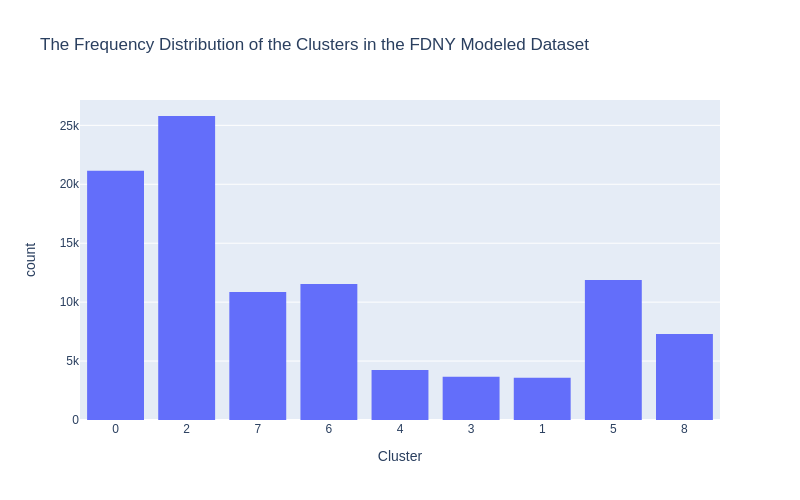

In [111]:
#let look at a histogram of the clusters 
fig = px.histogram(fdnyc_data, x = 'Cluster', title="The Frequency Distribution of the Clusters in the FDNY Modeled Dataset")
fig.show(renderer='png', height=500, width=800)

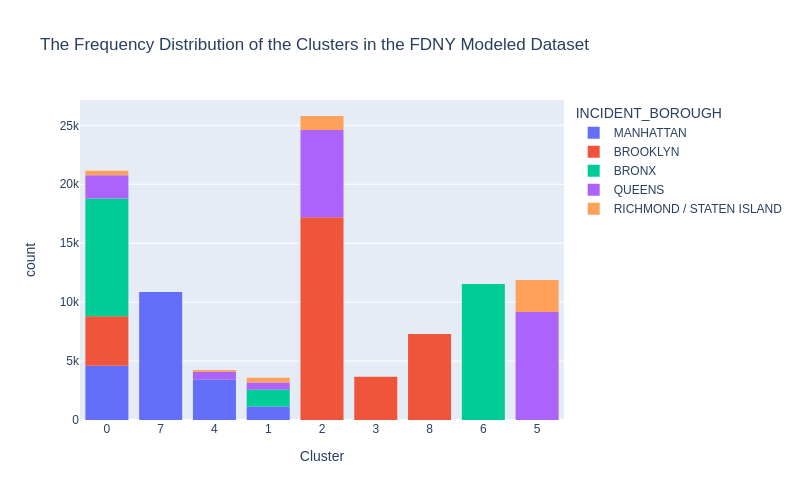

In [112]:
#let look at a histogram of the clusters stratified by Borough distribution
fig = px.histogram(fdnyc_data, x = 'Cluster',color="INCIDENT_BOROUGH", title="The Frequency Distribution of the Clusters in the FDNY Modeled Dataset")
fig.show(renderer='png', height=500, width=800)

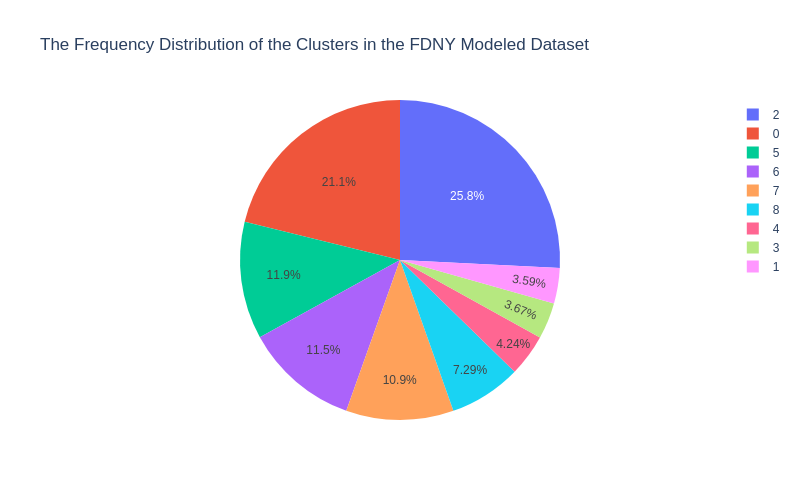

In [ ]:
#let look at a picture of the above dataframe
fig = px.pie(temp_df, names='Cluster', values='Count', title="The Frequency Distribution of the Clusters in the FDNY Modeled Dataset")
fig.show(renderer='png', height=500, width=800)

The Above picture shows the frequency distribution of the clusters in our FDNY kmodes modeled dataset. The picture shows that cluster `2` is the largest cluster at 25% followed by cluster `0` at 23% the data.Clusters `1`, `3` and `4` are the smaller clusters with each being less than 5% of the data. So now, the task becomes, lets go through each of the clusters doing an exploratory anaysis as part of building our perspective on ranking the clusters.

###### Let's start with cluster `0`

In [ ]:
cluster_0_df = get_cluster_df('0')

In [ ]:
#we can look at the distribution the baroughs in cluster
cluster_0_df["INCIDENT_BOROUGH"].value_counts()

BRONX                       9975
MANHATTAN                   4607
BROOKLYN                    4206
QUEENS                      1981
RICHMOND / STATEN ISLAND     379
Name: INCIDENT_BOROUGH, dtype: int64

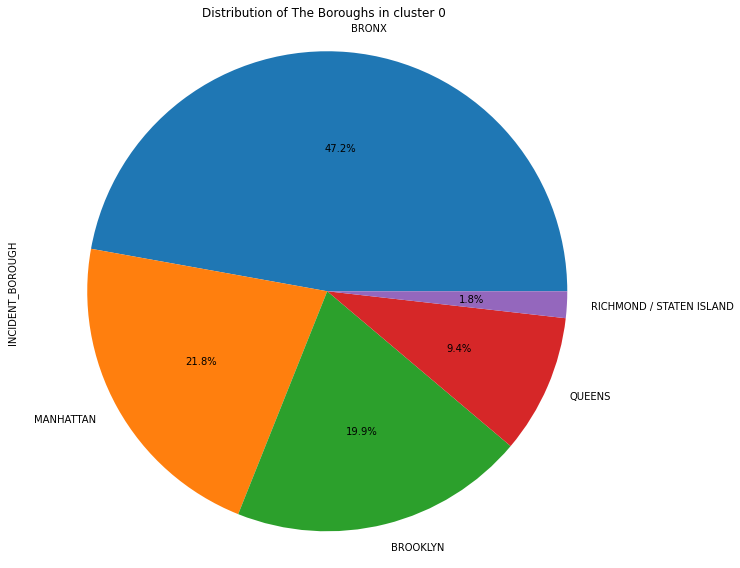

In [ ]:
cluster_0_df['INCIDENT_BOROUGH'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,8))

plt.axis('equal')
plt.title('Distribution of The Boroughs in cluster 0')
plt.tight_layout()
plt.show()

In [ ]:
#still at cluster 0 lets look at the INCIDENT_CLASSIFICATION which is the types of fires that the FDNYC responded to
cluster_0_df["INCIDENT_CLASSIFICATION"].value_counts()

Multiple Dwelling 'A' - Other fire                16547
Private Dwelling Fire                              2082
Multiple Dwelling 'A' - Food on the stove fire     1055
Multiple Dwelling 'B' Fire                          822
Multiple Dwelling 'A' - Compactor fire              642
Name: INCIDENT_CLASSIFICATION, dtype: int64

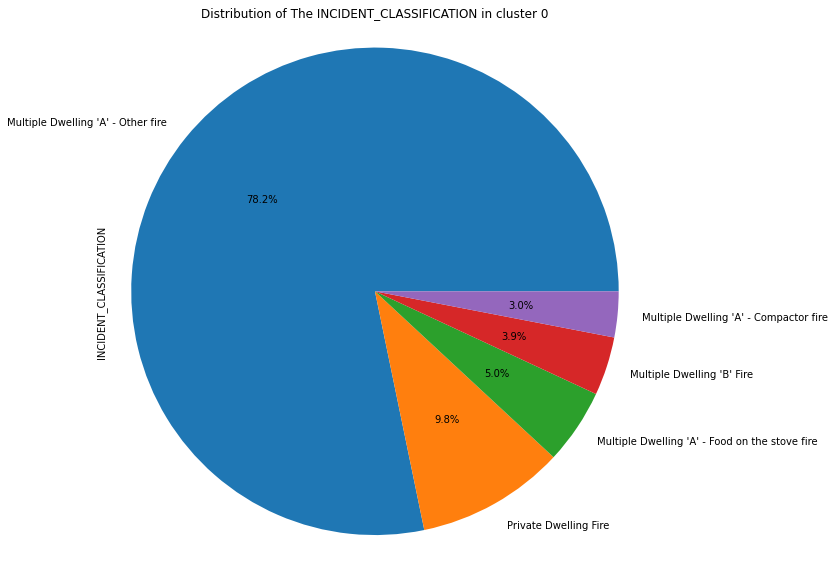

In [ ]:
cluster_0_df['INCIDENT_CLASSIFICATION'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,8))

plt.axis('equal')
plt.title('Distribution of The INCIDENT_CLASSIFICATION in cluster 0')
plt.tight_layout()
plt.show()

Multiple Dwelling ‘A’ - Compactor Fire: this is a commercial compactor fire that is confined to the contents of a compactor. This excludes home trash compactors. This is in a multiple dwelling that is occupied by three or more families living independently of each other.

Multiple Dwelling ‘A’ - Food on the stove fire: this is a fire involving the contents of a cooking vessel that does not extend beyond the cooking vessel. This is in a multiple dwelling that is occupied by three or more families living independently of each other.

Private Dwelling Fire: a fire in a residence for not more than two families living independently of each other with separate cooking facilities.



#### For NYPD

#### For NYC 311 Complaints and Service Requests

In [96]:
#We will do the same thing for the 311 complaints and service requests data 
nyc_csr311_data = pd.read_csv("/content/drive/MyDrive/Capstone Project/MODEL_NYC311Open_Data.csv")
nyc_csr311_data.head()

,Cluster,Unique Key,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,City,Borough
0,0,29491303,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10075,NEW YORK,MANHATTAN
1,1,29234415,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10029,NEW YORK,MANHATTAN
2,1,23185964,Department of Housing Preservation and Develop...,NONCONST,CARBON MONOXIDE,RESIDENTIAL BUILDING,11434,JAMAICA,QUEENS
3,0,40093189,Department of Housing Preservation and Develop...,FLOORING/STAIRS,FLOOR,RESIDENTIAL BUILDING,10031,NEW YORK,MANHATTAN
4,1,29693040,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11204,BROOKLYN,BROOKLYN


In [97]:
nyc_csr311_data['Incident Zip'] = nyc_csr311_data['Incident Zip'].astype(str)
nyc_csr311_data['Cluster'] = nyc_csr311_data['Cluster'].astype(str)
nyc_csr311_data.head()

,Cluster,Unique Key,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,City,Borough
0,0,29491303,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10075,NEW YORK,MANHATTAN
1,1,29234415,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10029,NEW YORK,MANHATTAN
2,1,23185964,Department of Housing Preservation and Develop...,NONCONST,CARBON MONOXIDE,RESIDENTIAL BUILDING,11434,JAMAICA,QUEENS
3,0,40093189,Department of Housing Preservation and Develop...,FLOORING/STAIRS,FLOOR,RESIDENTIAL BUILDING,10031,NEW YORK,MANHATTAN
4,1,29693040,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11204,BROOKLYN,BROOKLYN


In [98]:
#Lets start by looking at the number of cluster in our data modeled data 
temp_df = pd.DataFrame(nyc_csr311_data['Cluster'].value_counts())
temp_df = temp_df.reset_index()
temp_df.columns = [temp_df.columns[1], 'Count']
temp_df

,Cluster,Count
0,0,33467
1,2,24635
2,3,21737
3,1,20161


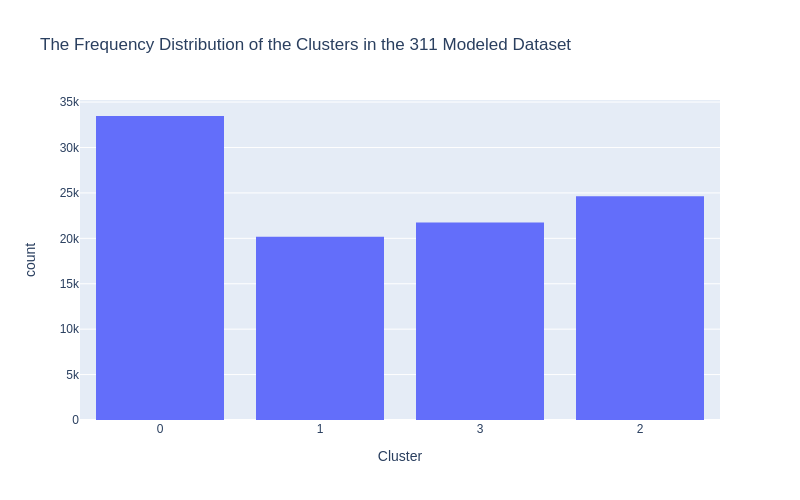

In [110]:
#let look at a histogram of the clusters 
fig = px.histogram(nyc_csr311_data, x = 'Cluster', title="The Frequency Distribution of the Clusters in the 311 Modeled Dataset")
fig.show(renderer='png', height=500, width=800)

In [ ]:
#let look at a histogram of the clusters stratified by Borough distribution
fig = px.histogram(nyc_csr311_data, x = 'Cluster', color='Borough',title="The Frequency Distribution of the Clusters in the 311 Modeled Dataset")
fig.show(renderer='png', height=500, width=800)

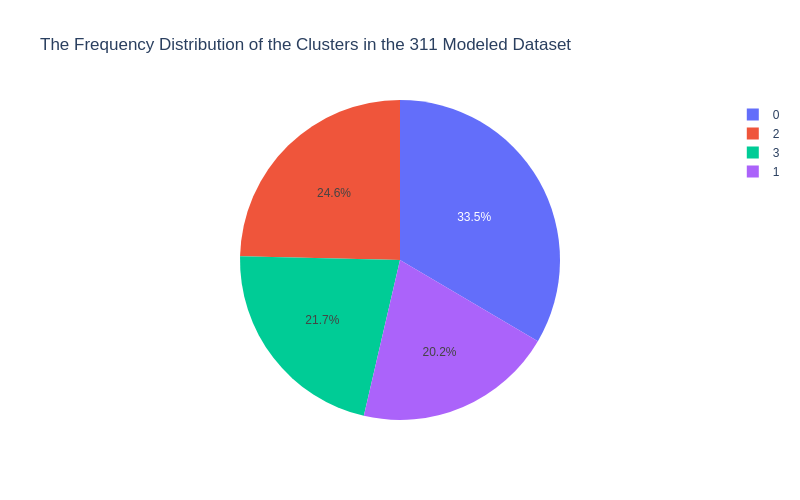

In [99]:
#let look at a picture of the above dataframe
fig = px.pie(temp_df, names='Cluster', values='Count', title="The Frequency Distribution of the Clusters in the 311 Modeled Dataset")
fig.show(renderer='png', height=500, width=800)

Cluster 3 looks to be having the largest cluster of the 4 with 33.5% followed by cluster 2. Let do the analysis of the cluster and uncover the different patterns and attributes of the clusters. Bassically, again, answering the question `Why were these data point clustered together?`.

In [101]:
cluster_0_df = get_cluster_df('0',cluster_grouped_dataset=nyc_csr311_data.groupby('Cluster'))
cluster_0_df.head()

,Cluster,Unique Key,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,City,Borough
0,0,29491303,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10075,NEW YORK,MANHATTAN
1,0,40093189,Department of Housing Preservation and Develop...,FLOORING/STAIRS,FLOOR,RESIDENTIAL BUILDING,10031,NEW YORK,MANHATTAN
2,0,27406518,New York City Police Department,Noise - Residential,Loud Television,Residential Building/House,10075,NEW YORK,MANHATTAN
3,0,36313197,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10024,NEW YORK,MANHATTAN
4,0,41395550,Department of Housing Preservation and Develop...,FLOORING/STAIRS,FLOOR,RESIDENTIAL BUILDING,10019,NEW YORK,MANHATTAN


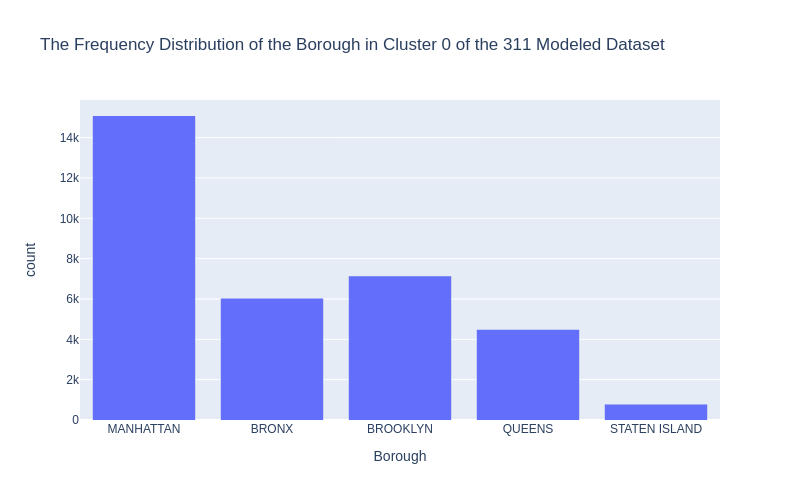

In [117]:
#first we take a look at the distribution of the boroughs in the cluster
fig = px.histogram(cluster_0_df, x = 'Borough', title="The Frequency Distribution of the Borough in Cluster 0 of the 311 Modeled Dataset")
fig.show(renderer='png', height=500, width=800)

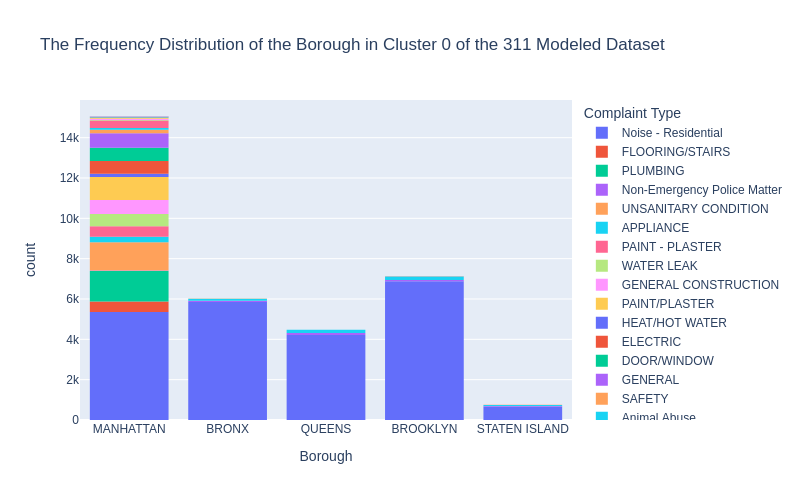

In [118]:
#first we take a look at the distribution of the boroughs in the cluster
fig = px.histogram(cluster_0_df, x = 'Borough', color='Complaint Type', title="The Frequency Distribution of the Borough in Cluster 0 of the 311 Modeled Dataset")
fig.show(renderer='png', height=500, width=800)

In [ ]:
frequescy distribution of:
 a particular borough among the clusters
 a particular zipcode among the clusters

 return the cluster that has the highest probability for a particula zip or borough. we will give you the summery statistics of the resulting clusters and how that cluster is ranked among its other clusters

### **Commentary and Next steps**

Continuing with analyzing the clusters generated from the Kmodes clustering models for both the Fire Department and NYPD.
 
> For the FDNYC (Fire department) clusters, we need to create a ranking measure that we can use for ranking which borough is riskier to fires and which types of fires. We also have to have a better understanding of the types of fires using the fire department codes. 

> The NYPD, we are going to do the same thing, continued analysis to uncover the types of crimes in each of the clusters and the distribution of the borough in relation to the crime. We will use this to develop a ranking measure of the borough and crime. 

> This is very important as crime is one of the determinants of riskiness as far as homeowners insurance. The other determinants are the zipcode or location of the property and the average cost of residential properties in the location. With this in mind, the end goal is to join the 311 complaints and service request data, borough ranking measures, the FDNYC fire borough ranking measures, NYPD crime borough ranking measures, and the average cost of properties and average residential insurance cost per borough. 

This is still a work in progress 
> This joined dataset will be used to create a linear combination of fire, crime, complaints/service requests, cost of residential property, and the average insurance cost per borough as the target. 